### Sentiment Analysis Computation
#### Tasks
In this notebook, we will work towards identifying relations between tweets and sentiment, by state, in the US. Our specific goals are as follows:
- scatter plot of number of covid19 cases vs number of tweets for each week (we can either do one plot for all of US or 52 plots for all US states) 
- find a way to encode depression. We will start by simply doing sentiment analysis.
- generally speaking, sentiment analysis isn't good. Not only is general sentiment value worse off than specific keywords, but python's sentiment analysis tool doesn't work very well
- find a way to filter noise. This includes trump data stuff. Presidential election of week 34 (Nov 5)
- add new column for each tweet that represents depression (trivial case: sentiment < 0)
- scatter plot above from June onwards
- calculate average for all weeks for each state, then do time slider with percentage increase/decrease

#### Import Libraries

In [2]:
import ast
import pandas as pd

#### Read Dataframe 

In [41]:
processed_geotweets_df_USA = pd.read_csv("./Stored_Dataframes/processed_geotweet_df_USA.csv")
processed_geotweets_df_USA.head(10)

,possibly_sensitive,entities,text,public_metrics,tweet_id,context_annotations,lang,in_reply_to_user_id,author_id,source,...,referenced_tweet_ids,users_mentioned,place_id,latitude,longitude,day,full_name,state,code,week
0,False,NaN,fuck corona i miss my boyfriend,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",1240727871095631872,"[{'domain': {'id': '123', 'name': 'Ongoing New...",en,NaN,859271883279159297,Twitter for iPhone,...,[],[],fbd6d2f5a4e4a15e,37.269176,-119.306607,1,"California, USA",California,CA,0
1,False,"{'mentions': [{'start': 0, 'end': 16, 'usernam...",@realDonaldTrump is a POS! https://t.co/3AswTG...,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1240741265064341505,"[{'domain': {'id': '10', 'name': 'Person', 'de...",en,2.507388e+07,781285034703491073,Twitter for iPhone,...,['1240701140141879298'],['realDonaldTrump'],fbd6d2f5a4e4a15e,37.269176,-119.306607,1,"California, USA",California,CA,0
2,False,"{'annotations': [{'start': 57, 'end': 67, 'pro...",You know what we all need during this Corona o...,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1240745322952790016,"[{'domain': {'id': '10', 'name': 'Person', 'de...",en,NaN,2841636924,Twitter for iPhone,...,[],[],fbd6d2f5a4e4a15e,37.269176,-119.306607,1,"California, USA",California,CA,0
3,False,NaN,This corona virus ain’t got shit over the vall...,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",1240753298140872705,"[{'domain': {'id': '123', 'name': 'Ongoing New...",en,NaN,888083561743384576,Twitter for iPhone,...,[],[],fbd6d2f5a4e4a15e,37.269176,-119.306607,1,"California, USA",California,CA,0
4,False,"{'urls': [{'start': 12, 'end': 35, 'url': 'htt...",Corona who? https://t.co/VRJuZvGoaV,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1240759511423397889,"[{'domain': {'id': '123', 'name': 'Ongoing New...",en,NaN,2996168750,Twitter for iPhone,...,[],[],fbd6d2f5a4e4a15e,37.269176,-119.306607,1,"California, USA",California,CA,0
5,False,"{'annotations': [{'start': 25, 'end': 30, 'pro...",They think my sister has Corona 👀,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1240761334205014016,"[{'domain': {'id': '123', 'name': 'Ongoing New...",en,NaN,3517880953,Twitter for iPhone,...,[],[],fbd6d2f5a4e4a15e,37.269176,-119.306607,1,"California, USA",California,CA,0
6,False,"{'annotations': [{'start': 31, 'end': 37, 'pro...","We know 1st-hand, hospitals in Detroit testing...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",1240763146597351424,"[{'domain': {'id': '123', 'name': 'Ongoing New...",en,NaN,1002264486890299392,Twitter for iPhone,...,[],[],fbd6d2f5a4e4a15e,37.269176,-119.306607,1,"California, USA",California,CA,0
7,False,"{'annotations': [{'start': 88, 'end': 93, 'pro...",Corona actually *this* close to making me watc...,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1240768630549172224,"[{'domain': {'id': '46', 'name': 'Brand Catego...",en,NaN,19273823,Twitter for iPhone,...,[],[],fbd6d2f5a4e4a15e,37.269176,-119.306607,1,"California, USA",California,CA,0
8,False,"{'mentions': [{'start': 0, 'end': 7, 'username...",@heIIIa Corona Cove,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1240770507273695232,"[{'domain': {'id': '123', 'name': 'Ongoing New...",en,8.872029e+17,1489852370,Twitter for iPhone,...,['1240765035900620800'],['HeiiiA'],fbd6d2f5a4e4a15e,37.269176,-119.306607,1,"California, USA",California,CA,0
9,False,"{'annotations': [{'start': 33, 'end': 43, 'pro...",Two cases of the corona virus in Bakersfield. ...,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1240778790332026880,"[{'domain': {'id': '123', 'name': 'Ongoing New...",en,NaN,211352793,Twitter for iPhone,...,[],[],fbd6d2f5a4e4a15e,37.269176,-119.306607,1,"California, USA",California,CA,0


#### Understand Data
Display tweet text for first 100 tweets\
Same for first 100 in a specific state\

In [43]:
for twt in processed_geotweets_df_USA['text'][::35000]:
    print("NEW TWEET:")
    print(twt)

NEW TWEET:
fuck corona i miss my boyfriend
NEW TWEET:
@Lee2957409374 @realDonaldTrump 1918?????? Do you know the resources available to people at that time to the time we live in today??? It’s 2020, systematic opppresion, police brutality, rasism are issues people are dying from, yes there is still a pandemic going on, but there are resources available to.......
NEW TWEET:
@tmorello teachers are dying and this is how the board and superintendent handled it. We lost two educators to #COVID19 the day of that board meeting-if you have time it'd be great if you could read this and share. Hope all is well with you and yours! 
https://t.co/zKmZULbtGW
NEW TWEET:
Wear your FUCKING MASKS please for the love of god https://t.co/UTRy4cIMRW
NEW TWEET:
@waitbutwhy Have you written about Covid yet?
NEW TWEET:
THANK YOU. Nice to see evidence there can be a functioning rational government protecting lives of citizens. https://t.co/RyanVffyu0
NEW TWEET:
@SigmaCrash13 @polinatorr_ @hugoecruz @LAClippers

In [5]:
for twt in processed_geotweets_df_USA[processed_geotweets_df_USA['code']=='RI']['text'][:50:]:
    print("NEW TWEET")
    print(twt)

NEW TWEET
I’m tired of seeing this corny ass pick up line 😂😂 https://t.co/j7jGMpQGqU
NEW TWEET
The weather is nice and people said fuck the corona?! 🤦🏽‍♀️🤦🏽‍♀️🤦🏽‍♀️
NEW TWEET
since corona, 3am feels like 9pm and idk how to deal with it.
NEW TWEET
I’m crying 😭😭😭 https://t.co/AkxcAOToTg
NEW TWEET
But I ain’t kill nobody ? If anything lock up CORONA , That bitch trynna kill Errybody ! https://t.co/oEds89QdwE
NEW TWEET
You got the corona virus https://t.co/ZeVZh5hmYv
NEW TWEET
All ICE agents should die from corona https://t.co/fsU1ZdYFUm
NEW TWEET
Staying in dress code and inside during this Corona Outbreak! Stay busy, stay positive https://t.co/sala5bpC5c
NEW TWEET
Take what he says serious and this is time for everyone in society to hold eachother accountable!!!! #SocialDistanacing https://t.co/r1IEYV3vxY
NEW TWEET
I’m people https://t.co/2Fyz5N9UYN
NEW TWEET
I sweaaaaa they gon carry me out in a stretcher the next corona-free rave I end up at 😭😩
NEW TWEET
@sambitswaraj @BJPLive @BJP4Ind

#### Create Sentiment Dataframe where we will Store Tweet Polarities

In [6]:
sentiment_df = processed_geotweets_df_USA.copy()

####  Clean Tweets by Removing Retweet Indications (RT), Links and Blank Lines

In [8]:
import re
def clean_tweets(text):
    text = re.sub("RT @[\w]*:","",text)
    #text = re.sub("@[\w]*","",text)
    text = re.sub("https?://[A-Za-z0-9./]*","",text)
    text = re.sub("\n","",text)
    return text
sentiment_df['clean_text'] = sentiment_df['text'].apply(lambda x: clean_tweets(x))
sentiment_df = sentiment_df[["clean_text", "latitude", "longitude", "day", "state", "code", "week"]]

,clean_text,latitude,longitude,day,state,code,week
0,fuck corona i miss my boyfriend,37.269176,-119.306607,1,California,CA,0
1,@realDonaldTrump is a POS!,37.269176,-119.306607,1,California,CA,0
2,You know what we all need during this Corona o...,37.269176,-119.306607,1,California,CA,0
3,This corona virus ain’t got shit over the vall...,37.269176,-119.306607,1,California,CA,0
4,Corona who?,37.269176,-119.306607,1,California,CA,0
...,...,...,...,...,...,...,...
3490466,This friggin bastard needs to go!!,26.907283,-82.322270,349,Florida,FL,49
3490467,A mi me vale verga I ain’t going to wear a mask,27.741656,-98.105223,349,Texas,TX,49
3490468,hate it here.,48.432080,-122.602550,349,Washington,WA,49
3490469,"Is working from home, living at work?",37.148140,-94.439664,350,Missouri,MO,49


#### Mark tweets related to US Presidential Election as Unrelated

In [9]:
regexp = re.compile(r'(?i)Trump|Biden|Election|democratic|republican|party|President|campaign|elector|candidate') #party can be party or political party
def unrelated(text):
    if regexp.search(text):
        return 1
    return 0
sentiment_df['Unrelated'] = sentiment_df['clean_text'].apply(unrelated)
print('Before Presidential Election filtering: {}'.format(len(sentiment_df)))

Before Presidential Election filtering: 3490471


<ipython-input-9-24810420bd2d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['Unrelated'] = sentiment_df['clean_text'].apply(unrelated)


#### Sentiment Dataframe will only Contain Tweets Unrelated to US Election

In [10]:
sentiment_df = sentiment_df[sentiment_df['Unrelated']==0]
print('After Presidential Election filtering: {}'.format(len(sentiment_df)))
sentiment_df

After Presidential Election filtering: 3027431


,clean_text,latitude,longitude,day,state,code,week,Unrelated
0,fuck corona i miss my boyfriend,37.269176,-119.306607,1,California,CA,0,0
2,You know what we all need during this Corona o...,37.269176,-119.306607,1,California,CA,0,0
3,This corona virus ain’t got shit over the vall...,37.269176,-119.306607,1,California,CA,0,0
4,Corona who?,37.269176,-119.306607,1,California,CA,0,0
5,They think my sister has Corona 👀,37.269176,-119.306607,1,California,CA,0,0
...,...,...,...,...,...,...,...,...
3490465,"I won’t lie, y’all. I cried with relief. I had...",32.138398,-85.697567,349,Alabama,AL,49,0
3490466,This friggin bastard needs to go!!,26.907283,-82.322270,349,Florida,FL,49,0
3490467,A mi me vale verga I ain’t going to wear a mask,27.741656,-98.105223,349,Texas,TX,49,0
3490468,hate it here.,48.432080,-122.602550,349,Washington,WA,49,0


#### Form Wordcloud for All Tweets

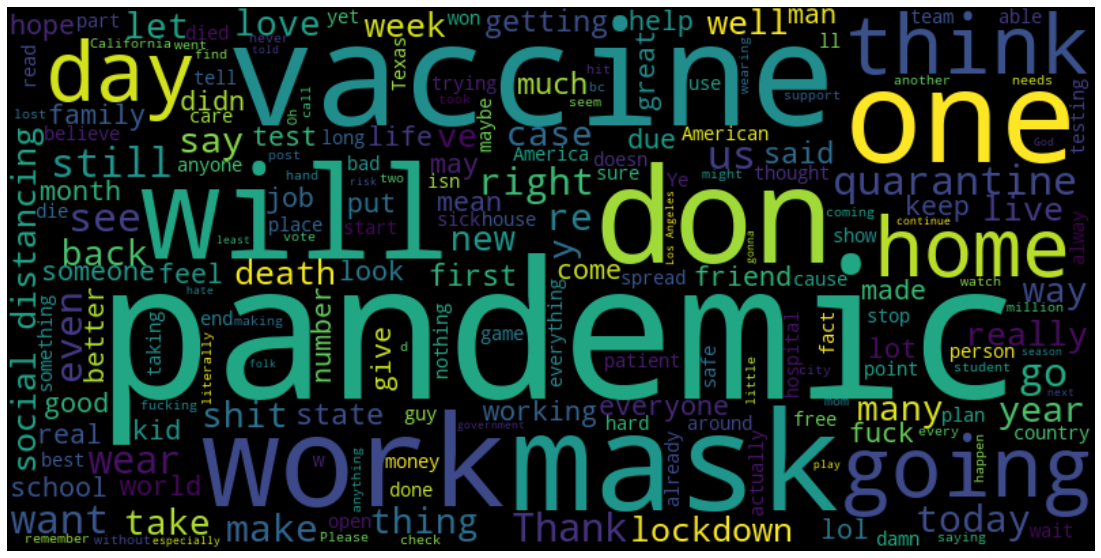

In [11]:
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords=set(STOPWORDS)
stopwords.update(['corona', 'coronavirus', 'covid', 'covid19', 'virus', 'amp', 'people', 'got', 'need', 'know', 'now', 'u', 'time', 'S', 't', 'm'])
textt = " ".join(tweet for tweet in sentiment_df['clean_text'][:500000:])
wordcloud = WordCloud(stopwords=stopwords, width=800, height=400).generate(textt)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('nonelection_wordcloud.png')
plt.show()

#### Create Dataframe containing only Tweets related to both Family members and Covid (call it family_df)

In [28]:
family_regexp = re.compile(r'(?i)sister|brother|mother|father|grandpa|grandma|grandparents|grandmother|grandfather|cousin|dad|mom') #party can be party or political party
covid_regexp = re.compile(r'(?i)corona|covid|virus|pandemic|quarantine|lockdown')
def family_related(text):
    if not family_regexp.search(text):
        return 0
    if not covid_regexp.search(text):
        return 0
    return 1
sentiment_df['Family_Related'] = sentiment_df['clean_text'].apply(family_related)
family_related_tweetdf = sentiment_df[sentiment_df['Family_Related']==1]
print(len(family_related_tweetdf))

<ipython-input-28-99664667771f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['Family_Related'] = sentiment_df['clean_text'].apply(family_related)


64677


#### Possibly depressed Dataframe
Create dataframe containing only tweets related to both family members and covid (call it depressed_df)

In [12]:
likelydepressed_regexp = re.compile(r'(?i)overwhelmed|exhausted|distressed|anxiety|anxious|tired|low|depression|discouraged|desperate|demotivated|insomnia|cry|nervous|worried|lonely|sad|empty|suicide|antidepressant|hopeless') #party can be party or political party
#covid_regexp = re.compile(r'(?i)corona|covid|virus|pandemic|quarantine|lockdown')
def depression_detector(text):
    if likelydepressed_regexp.search(text):
        return 1
#     if not covid_regexp.search(text):
#         return 0
    return 0
sentiment_df['Depression_Related'] = sentiment_df['clean_text'].apply(depression_detector)
depression_related_tweetdf = sentiment_df[sentiment_df['Depression_Related']==1]
print(len(depression_related_tweetdf))

197766


<ipython-input-12-c890b7c7819e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['Depression_Related'] = sentiment_df['clean_text'].apply(depression_detector)


#### Going over depressed dataframe
Most people here don't seem to be depressed; rather, they seem to just be a bunch of energetic people

In [19]:
for twt in depression_related_tweetdf['clean_text'][::2000]:
    print("NEW TWEET")
    print(twt)

NEW TWEET
We know 1st-hand, hospitals in Detroit testing solely 4 Flu variants. If negative, assume &amp; treat as Corona, keeping #coronanumbers low &amp; vague at best. This is occurring throughout US Drs forced to circumvent #COVID19 data inclusion due to lack of test processing capabilities
NEW TWEET
@GAFollowers Visit  to purchase COVID-19 antibody test kits.
NEW TWEET
@JStormogipson @ScottGottliebMD Good 🍎 to 🍎 comparison BUT it’s unclear if herd immunity is even possible w SARS COV2. States following Sweden’s lead should acknowledge the gamble.
NEW TWEET
Really sad that this is even a discussion... #COVIDIOTS #SocialDistance #WearADamnMask 
NEW TWEET
I urge to watch the clip.  I am following the Governor’s “recommendation”, however the definition of adversarial is: opposed; hostile.  Asking your legal counsel to attend seems to be adversarial.  The word “order” would have solve anguish for Supts. @hcpsky @KASAEdLeader 
NEW TWEET
#kissyourcoworkers Day! #ijustmadethatup #babyaspe

#### Let's be a little more stricter in our depression diagnosis...

In [21]:
probdepressed_regexp = re.compile(r'(?i)overwhelmed|exhausted|distressed|anxiety|anxious|depression|discouraged|demotivated|insomnia|lonely|empty|suicide|antidepressant|hopeless') #party can be party or political party
#covid_regexp = re.compile(r'(?i)corona|covid|virus|pandemic|quarantine|lockdown')
def depression_detector_strict(text):
    if probdepressed_regexp.search(text):
        return 1
#     if not covid_regexp.search(text):
#         return 0
    return 0
sentiment_df['Depression_Expected'] = sentiment_df['clean_text'].apply(depression_detector_strict)
strict_depression_related_tweetdf = sentiment_df[sentiment_df['Depression_Expected']==1]
print(len(strict_depression_related_tweetdf))
for twt in strict_depression_related_tweetdf['clean_text'][::2000]:
    print("NEW TWEET")
    print(twt)

25862
NEW TWEET
my anxiety levels are literally through the roof right now i need this corona shit to end right now
NEW TWEET
Suicide figures are up 200% since lockdown. Could 2 friends please copy and re-post this tweet? We’re trying to demonstrate that someone is always listening. Call 116 123 (Samaritans UK) Call 1-800-273-8255 (USA) Just two. Any two. Copy, not retweet.
NEW TWEET
Got my covid vaccine today. I’m exhausted and my arm hurts but it’s better than being on a ventilator or worse, dead.
NEW TWEET
Forwarding this to my therapist for reason #2947 why I am stressed/anxious/everything 
NEW TWEET
The volume of patients coming to the ER has drastically declined. But what is seen in the ER versus the admitted floors is different. The hospitals are still overwhelmed. However, the overall situation feels promising and social distancing is working.#COVID @NYGovCuomo
NEW TWEET
I suffer anxiety and have panic attacks easily if too many people close in on me. I wear my mask easily. Als

<ipython-input-21-067d529809e3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['Depression_Expected'] = sentiment_df['clean_text'].apply(depression_detector_strict)


#### Form Wordcloud for all Family-Related Tweets

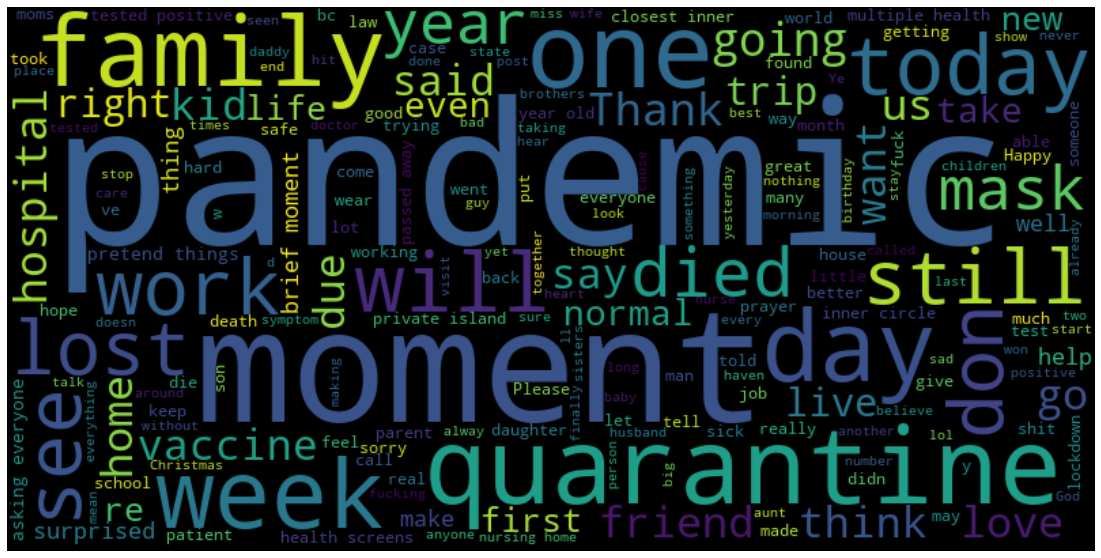

In [33]:
textt2 = " ".join(tweet for tweet in family_related_tweetdf['clean_text'])
stopwords2 = set(STOPWORDS)
stopwords2.update(['corona', 'coronavirus', 'covid', 'covid19', 'virus', 'amp', 'people', 'got', 'need', 'know', 'now', 'u', 'time', 'S', 't', 'm'])
stopwords2.update(['sister', 'brother', 'mother', 'father', 'grandpa', 'grandma', 'grandparents', 'grandmother', 'grandfather', 'cousin', 'dad', 'mom'])
wordcloud2 = WordCloud(stopwords=stopwords2, width=800, height=400).generate(textt2)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.savefig('family_related_wordcloud.png')
plt.show()

#### Form Wordcloud for all Depression-Related Tweets

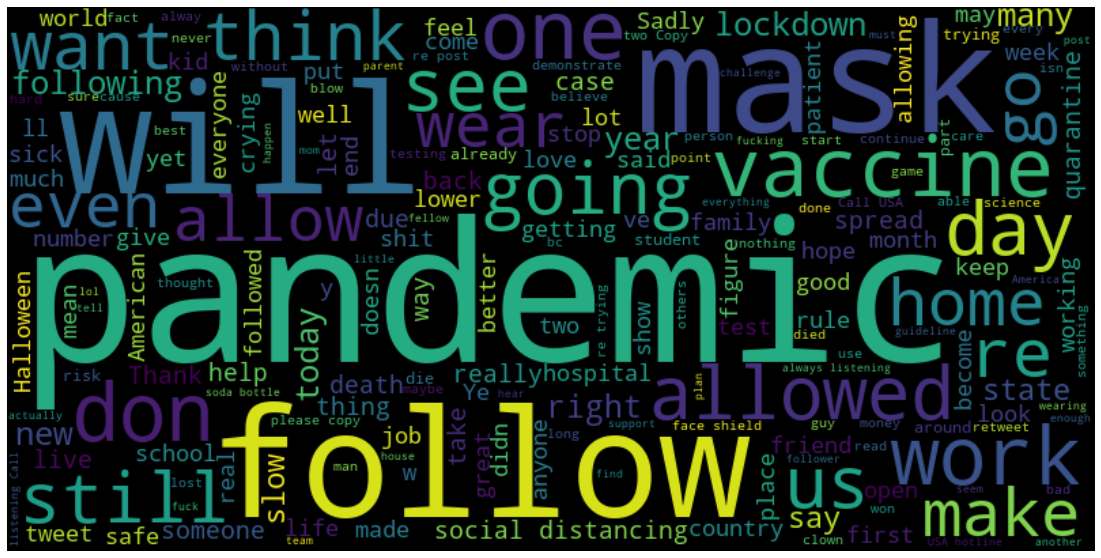

In [24]:
textt3 = " ".join(tweet for tweet in depression_related_tweetdf['clean_text'])
stopwords3 = set(STOPWORDS)
stopwords3.update(['corona', 'coronavirus', 'covid', 'covid19', 'virus', 'amp', 'people', 'got', 'need', 'know', 'now', 'u', 'time', 'S', 't', 'm'])
stopwords3.update(['overwhelmed', 'exhausted', 'distressed', 'anxiety', 'anxious', 'tired', 'low', 'depression', 'discouraged', 'desperate', 'demotivated', 'insomnia', 'cry', 'nervous', 'worried', 'lonely', 'sad', 'empty', 'suicide', 'antidepressant', 'hopeless'])
wordcloud3 = WordCloud(stopwords=stopwords3, width=800, height=400).generate(textt3)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('possibly_depression_related_wordcloud.png')
plt.show()

#### Form Wordcloud for Stricter Depression-Related Tweets

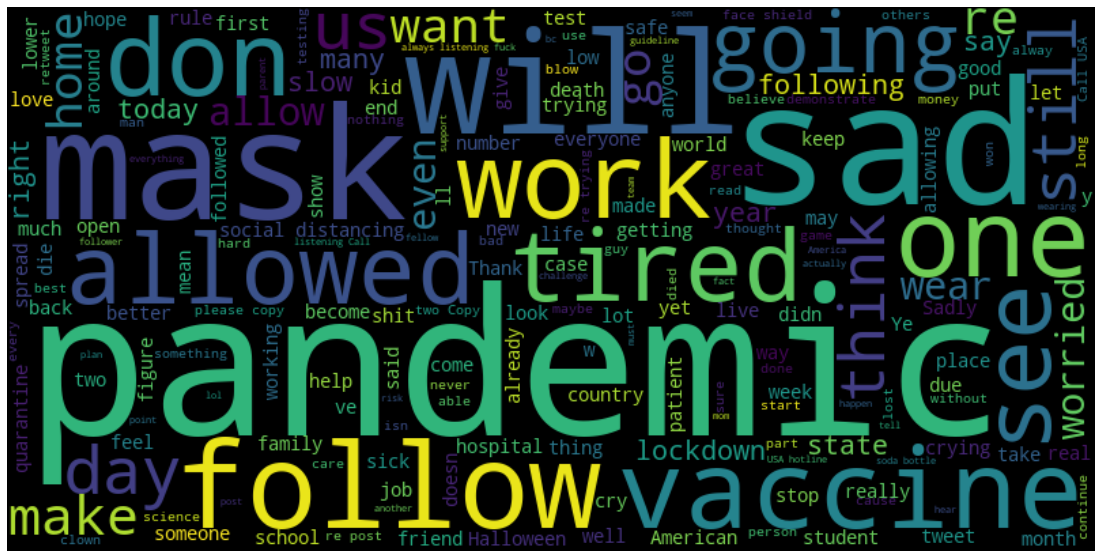

In [25]:
textt4 = " ".join(tweet for tweet in strict_depression_related_tweetdf['clean_text'])
stopwords4 = set(STOPWORDS)
stopwords4.update(['corona', 'coronavirus', 'covid', 'covid19', 'virus', 'amp', 'people', 'got', 'need', 'know', 'now', 'u', 'time', 'S', 't', 'm'])
stopwords4.update(['overwhelmed', 'exhausted', 'distressed', 'anxiety', 'anxious', 'depression', 'discouraged', 'demotivated', 'insomnia', 'lonely', 'empty', 'suicide', 'antidepressant', 'hopeless'])
wordcloud4 = WordCloud(stopwords=stopwords4, width=800, height=400).generate(textt3)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis("off")
plt.savefig('strict_depression_related_wordcloud.png')
plt.show()

#### Compute Sentiment of Each Tweet 

In [37]:
# Compare averaage sentiment of all non-trump tweets to average of family-related tweets
import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
def sentimentscore(text):
    return sia.polarity_scores(text)["compound"]
sentiment_df['Polarity'] = sentiment_df['clean_text'].apply(sentimentscore)
family_related_tweetdf['Polarity'] = family_related_tweetdf['clean_text'].apply(sentimentscore)
depression_related_tweetdf['Polarity'] = depression_related_tweetdf['clean_text'].apply(sentimentscore)
strict_depression_related_tweetdf['Polarity'] = strict_depression_related_tweetdf['clean_text'].apply(sentimentscore)

<ipython-input-37-8199903ced63>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depression_related_tweetdf['Polarity'] = depression_related_tweetdf['clean_text'].apply(sentimentscore)
<ipython-input-37-8199903ced63>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strict_depression_related_tweetdf['Polarity'] = strict_depression_related_tweetdf['clean_text'].apply(sentimentscore)


#### Sentiment Statistics: All Tweets vs Family-Related Tweets

In [39]:
print('Mean Polarity for non-trump tweets: ' + str(sentiment_df['Polarity'].mean()))
print('Mean Polarity for family-related tweets: ' + str(family_related_tweetdf['Polarity'].mean()))
print('Mean Polarity for depression-related tweets: ' + str(depression_related_tweetdf['Polarity'].mean()))
print('Mean Polarity for strict-depression-related tweets: ' + str(strict_depression_related_tweetdf['Polarity'].mean()) + '\n')

print('Mean Polarity for positive non-trump tweets: ' + str(sentiment_df[sentiment_df['Polarity']>0]['Polarity'].mean()))
print('Mean Polarity for positive family-related tweets: ' + str(family_related_tweetdf[family_related_tweetdf['Polarity']>0]['Polarity'].mean()))
print('Mean Polarity for positive depression-related tweets: ' + str(depression_related_tweetdf[depression_related_tweetdf['Polarity']>0]['Polarity'].mean()))
print('Mean Polarity for positive strict depression-related tweets: ' + str(strict_depression_related_tweetdf[strict_depression_related_tweetdf['Polarity']>0]['Polarity'].mean()) + '\n')

print('Mean Polarity for negative non-trump tweets: ' + str(sentiment_df[sentiment_df['Polarity']<0]['Polarity'].mean()))
print('Mean Polarity for negative family-related tweets: ' + str(family_related_tweetdf[family_related_tweetdf['Polarity']<0]['Polarity'].mean()))
print('Mean Polarity for negative depression-related tweets: ' + str(depression_related_tweetdf[depression_related_tweetdf['Polarity']<0]['Polarity'].mean()))
print('Mean Polarity for negative strict depression-related tweets: ' + str(strict_depression_related_tweetdf[strict_depression_related_tweetdf['Polarity']<0]['Polarity'].mean()))

Mean Polarity for non-trump tweets: 0.04905331262710859
Mean Polarity for family-related tweets: 0.06875876895959923
Mean Polarity for depression-related tweets: -0.056350563291971315
Mean Polarity for strict-depression-related tweets: -0.13973218621916328

Mean Polarity for positive non-trump tweets: 0.5178338886252726
Mean Polarity for positive family-related tweets: 0.5453263417969357
Mean Polarity for positive depression-related tweets: 0.5198378262854825
Mean Polarity for positive strict depression-related tweets: 0.5015089452310395

Mean Polarity for negative non-trump tweets: -0.500046942800789
Mean Polarity for negative family-related tweets: -0.5384460849192322
Mean Polarity for negative depression-related tweets: -0.5347360585109656
Mean Polarity for negative strict depression-related tweets: -0.5144277236436788


#### Store dataframes for family, depression and strict-depression tweets

In [45]:
sentiment_df.to_csv('./Stored_Dataframes/sentiment_df.csv')
family_related_tweetdf.to_csv('./Stored_Dataframes/family_related_tweetdf.csv')
depression_related_tweetdf.to_csv('./Stored_Dataframes/depression_related_tweetdf.csv')
strict_depression_related_tweetdf.to_csv('./Stored_Dataframes/strict_depression_related_tweetdf.csv')